# Importing data using pandas libirary
and printing the first 5 rows of data

In [44]:
import pandas as pd
data = pd.read_csv("boat_data.csv")
data.head(100)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
...,...,...,...,...,...,...,...,...,...,...
95,EUR 8500,Sport Boat,Sunbird power boats,"Used boat,Unleaded",1994,5.74,2.31,PVC,"France Â» Chalon-sur-SaÃ´ne, France",78
96,EUR 8500,Pilothouse,Jeanneau power boats,"Used boat,Unleaded",2006,5.80,2.50,PVC,France Â» 29200 BREST,116
97,EUR 8500,Sport Boat,Hellwig power boats,"Used boat,Unleaded",2016,3.10,1.40,GRP,Germany Â» Kelheim,250
98,EUR 8500,Center console boat,Janmor power boats,"Used boat,Unleaded",2005,5.30,2.33,NaN,"France Â» GRANVILLE, France",173


In [45]:
# !pip install easymoney

# Cleaning and exploring Data
- Dropping duplicates values
- dropping null values
- creating two columns (currencey , prices) from column (price) to separate each of them
- setting the data type of prices as integar
- Relplace the Â£ sign with GBP to facilate converting currencies
- creating a new column (size) by multiplying the ( length and width) columns
- creating (country) column by separating the country from (location) column
- creating the columns( diesel , display, electric, gas, unleaded, used, new, perpane, hybrid, on order) from (type) column
- Imporing easymony package to convert the money to USD and set in column (converted)
- Setting the data type of (Year Bulit) as integar
- dropping The unlogical values
- adding column Age which the age of the boat

In [46]:
# Dropping duplicates values
data = data.drop_duplicates()
# Dropping null values
data = data.dropna()
# Creating two columns (Currency , Prices) from column (Price) to separate each of them 
data[['Currency','Prices']] = data['Price'].str.split(' ', expand=True)
# Seting the data type of prices as integar
data['Prices']= data['Prices'].astype('int')
# Relplace the Â£ sign with GBP to facilate converting currencies
data.Currency = data.Currency.str.replace('Â£','GBP')
# Creating a new column (Size) by multiplying the (Length and Width) Columns
data['Size'] = round(data['Width'].mul(data['Length']),2)
# Creating (Country) column by Separating the Country from (location) column 
data['Country'] = data['Location'].str.split('Â| Â', n=1, expand= True)[0]
# Imporing easymony package to convert the money to USD and set in column (converted)
from easymoney.money import EasyPeasy 
ep = EasyPeasy() 
data['prices_in_usd'] = data.apply(lambda x: ep.currency_converter(x['Prices'], from_currency=x['Currency'], to_currency="USD"), axis=1)
# Setting the data type of (Year Bulit) as integar
data['Year Built']= data['Year Built'].astype('int')
# dropping The unlogical values
data= data[data["Year Built"]!=0]
# adding column Age which the age of the boat
data['Life_Time'] = 2022 - data['Year Built']
data.head(100)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Prices,Size,Country,prices_in_usd,Life_Time
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,6.00,Germany,3741.28,2
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,5.18,Germany,3643.73,3
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3500,7.61,Switzerland,3630.73,35
12,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,EUR,3500,9.40,Italy,3752.00,18
13,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113,CHF,4600,7.26,Switzerland,4771.82,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,CHF 12950,Sport Boat,Atlantic Marine power boats,new boat from stock,2019,5.30,2.39,GRP,Switzerland Â» Kesswil,284,CHF,12950,12.67,Switzerland,13433.71,3
160,CHF 12900,Runabout,Safter Marine power boats,new boat from stock,2020,5.00,1.90,GRP,Switzerland Â» Zugersee Â» Neuheim,273,CHF,12900,9.50,Switzerland,13381.85,2
161,CHF 12900,Working Boat,Tinn-Silver power boats,"Display Model,Unleaded",2019,4.50,1.75,Aluminium,Switzerland Â» Zugersee Â» Ruswil,365,CHF,12900,7.88,Switzerland,13381.85,3
165,EUR 12770,Bowrider,Maxima power boats,new boat from stock,2020,4.90,1.90,GRP,Germany Â» Lake Constance Â» Konstanz-Dettingen,180,EUR,12770,9.31,Germany,13689.44,2


In [47]:
data.describe()

,Year Built,Length,Width,Number of views last 7 days,Prices,Size,prices_in_usd,Life_Time
count,6589.000000,6589.000000,6589.000000,6589.000000,6.589000e+03,6589.000000,6.589000e+03,6589.000000
mean,2006.793292,11.230253,3.476462,161.814691,2.908500e+05,44.407204,2.969321e+05,15.206708
std,12.652581,5.181874,1.122416,170.823425,7.937436e+05,38.991071,7.970398e+05,12.652581
min,1901.000000,2.320000,0.860000,13.000000,3.399000e+03,2.070000,3.630730e+03,1.000000
25%,2000.000000,7.470000,2.550000,73.000000,4.499000e+04,18.920000,4.813280e+04,4.000000
50%,2008.000000,10.000000,3.300000,113.000000,9.500000e+04,33.250000,1.005194e+05,14.000000
75%,2018.000000,13.720000,4.200000,187.000000,2.500000e+05,57.460000,2.669280e+05,22.000000
max,2021.000000,56.000000,16.000000,3263.000000,2.350000e+07,840.000000,2.519200e+07,121.000000


In [48]:
# Fixing The Countries Names
data["Country"]=data["Country"].str.replace(" ", "", regex= True)
data["Country"]=data["Country"].str.replace("(", "", regex= True)
data["Country"]=data["Country"].str.replace(")", "", regex= True)
data["Country"]=data["Country"].str.replace("?", "", regex= True)
data["Country"]=data["Country"].str.replace("Thun", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("Italien", "Italy", regex= True)
data["Country"]=data["Country"].str.replace("24782BÃ¼delsdorf", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Adria", "Italy", regex= True)
data["Country"]=data["Country"].str.replace("Angera", "Italy", regex= True)
data["Country"]=data["Country"].str.replace("Avenches", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("Beilngries", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("BelgiÃ«,Zulte", "Belgium", regex= True)
data["Country"]=data["Country"].str.replace("Bielefeld", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Brandenburg", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("BrandenburganderHavel", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Bremen", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("CalanovaMallorca", "Spain", regex= True)
data["Country"]=data["Country"].str.replace("Croatia(Hrvatska)", "Croatia", regex= True)
data["Country"]=data["Country"].str.replace("Dalmatien", "Croatia", regex= True)
data["Country"]=data["Country"].str.replace("Donau", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Faoug", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("GermanyanderHavel", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Greetsile/KrummhÃ¶rn", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Heilbronn", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Ibiza", "Spain", regex= True)
data["Country"]=data["Country"].str.replace("Izola", "Slovenia", regex= True)
data["Country"]=data["Country"].str.replace("JuelsmindeHavn", "Denmark", regex= True)
data["Country"]=data["Country"].str.replace("Katwijk", "Netherlands", regex= True)
data["Country"]=data["Country"].str.replace("KroatienKrk", "Kroatien", regex= True)
data["Country"]=data["Country"].str.replace("LagoMaggiore", "France", regex= True)
data["Country"]=data["Country"].str.replace("LagoMaggiore,Minusio", "France", regex= True)
data["Country"]=data["Country"].str.replace("LagodiGarda", "Italy", regex= True)
data["Country"]=data["Country"].str.replace("LakeConstance", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("LakeGeneva", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("Lommel", "Belgium", regex= True)
data["Country"]=data["Country"].str.replace("Mallorca", "Spain", regex= True)
data["Country"]=data["Country"].str.replace("MarinaPunat", "Croatia", regex= True)
data["Country"]=data["Country"].str.replace("NeustadtinHolsteinOstsee", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("NordseekÃ¼ste", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("NoviVinodolski", "Croatia", regex= True)
data["Country"]=data["Country"].str.replace("Oder", "Poland", regex= True)
data["Country"]=data["Country"].str.replace("Opwijk", "Belgium", regex= True)
data["Country"]=data["Country"].str.replace("Ostsee", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("PTÃ¸stkystenellersEsbjerg", "Denmark", regex= True)
data["Country"]=data["Country"].str.replace("PortoRotondo ", "Italy", regex= True)
data["Country"]=data["Country"].str.replace("Rheinfelden", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Rolle", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("Rovinij", "Croatia", regex= True)
data["Country"]=data["Country"].str.replace("RÃ¼gen", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Steinwiesen", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Stralsund", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("Tenero,lagoMaggiore", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("Thalwil", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("TravemÃ¼nde", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("VierwaldstÃ¤ttersee-Buochs", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("Welschenrohr", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("Zevenbergen", "Netherlands", regex= True)
data["Country"]=data["Country"].str.replace("ZÃ¼richse,8855WangenSZ", "Switzerland", regex= True)
data["Country"]=data["Country"].str.replace("annecy", "France", regex= True)
data["Country"]=data["Country"].str.replace("badenbaden", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("bodensee", "Germany", regex= True)
data["Country"]=data["Country"].str.replace("espa?a", "Spain", regex= True)
data["Country"]=data["Country"].str.replace("CzechRepublic", "Czech Republic", regex= True)
data["Country"]=data["Country"].str.replace("France,Minusio", "France", regex= True)
data["Country"]=data["Country"].str.replace("FrenchSouthernTerritories", "French Southern Territories", regex= True)
data["Country"]=data["Country"].str.replace("FuÃach", "France", regex= True)
data["Country"]=data["Country"].str.replace("PortoRotondo", "Porto Rotondo", regex= True)
data["Country"]=data["Country"].str.replace("IsleofMan", "Isle of Man", regex= True)
data["Country"]=data["Country"].str.replace("RussianFederation", "Russian Federation", regex= True)
data["Country"]=data["Country"].str.replace("SlovakRepublic", "Slovak Republic", regex= True)
data["Country"]=data["Country"].str.replace("UnitedKingdom", "United Kingdom", regex= True)
data["Country"]=data["Country"].str.replace("UnitedStates", "United States", regex= True)
data["Country"]=data["Country"].str.replace("Spain?a", "Spain", regex= True)

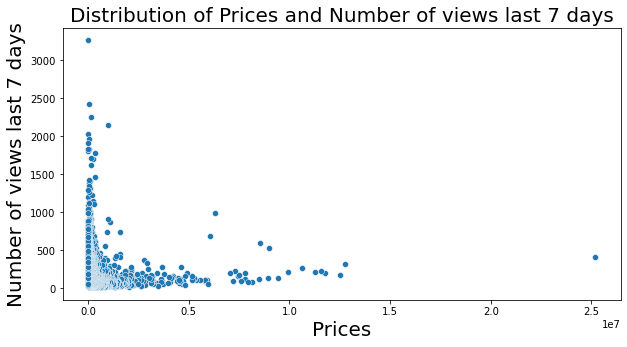

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10, 5))
ax= sns.scatterplot(x= 'prices_in_usd', y= 'Number of views last 7 days', data = data)
ax.set_title('Distribution of Prices and Number of views last 7 days', fontsize= 20)
ax.set_xlabel('Prices',fontsize=20)
ax.set_ylabel("Number of views last 7 days",fontsize=20)
plt.show()
fig.savefig('distrubtion of prices and number of views.jpg', bbox_inches='tight', dpi=150)

<Figure size 720x360 with 0 Axes>

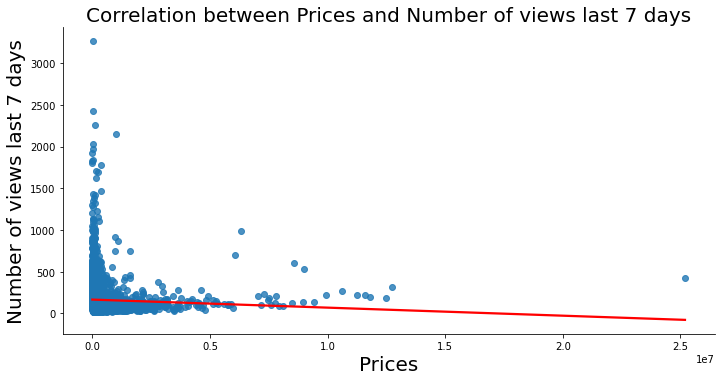

In [52]:
fig = plt.figure(figsize = (10, 5))
ax= sns.lmplot(x= 'prices_in_usd', y= 'Number of views last 7 days', data = data,ci = None, line_kws={'color': 'red'}, height=5, aspect=2)
ax = plt.gca()
ax.set_title('Correlation between Prices and Number of views last 7 days',fontsize= 20)
ax.set_xlabel('Prices',fontsize=20)
ax.set_ylabel("Number of views last 7 days",fontsize=20)
plt.show()
fig.savefig('corrline.jpg', bbox_inches='tight', dpi=150)

In [53]:
cor =round(data['Number of views last 7 days'].corr(data['prices_in_usd']),2)
print("The correllation between the prices and number of views ini last 7 days is {}".format(cor))

The correllation between the prices and number of views ini last 7 days is -0.05


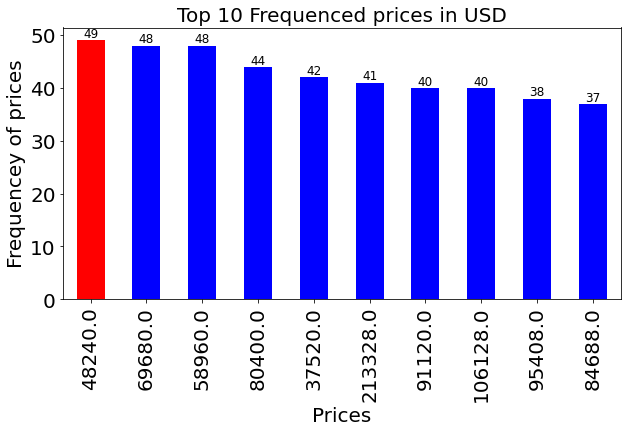

In [54]:
fig = plt.figure(figsize = (10, 5))
data.groupby("prices_in_usd")["Prices"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced prices in USD',fontsize= 20)
ax.set_xlabel('Prices',fontsize=20)
ax.set_ylabel("Frequencey of prices", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

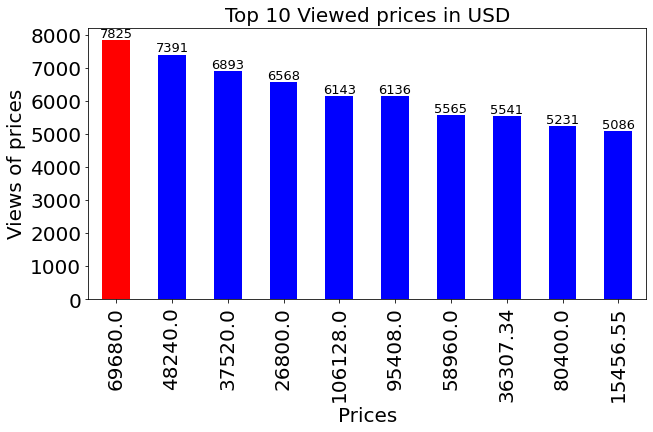

In [55]:
fig = plt.figure(figsize = (10, 5))
data.groupby("prices_in_usd")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed prices in USD',fontsize= 20)
ax.set_xlabel('Prices',fontsize=20)
ax.set_ylabel("Views of prices", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)
plt.show()

In [56]:
data.Currency.str.get_dummies().corrwith(data["Number of views last 7 days"]).sort_values(ascending= False).head(1)

CHF    0.454377
dtype: float64

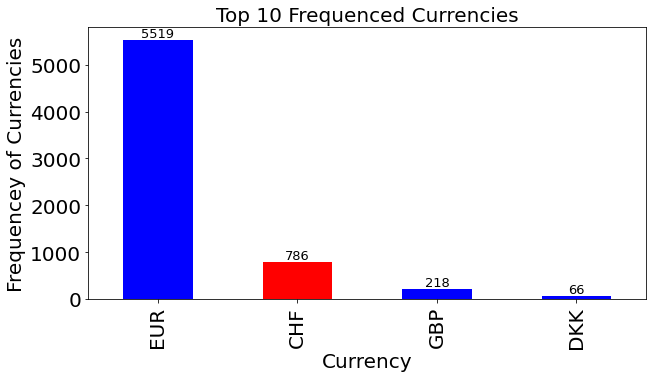

In [57]:
fig = plt.figure(figsize = (10, 5))
currencies=data.groupby("Currency")["Currency"].count().sort_values(ascending =False).head(10)

currencies.plot(kind="bar", fontsize=20, color= ["Blue", "Red", "blue", "blue"])
ax = plt.gca()
ax.set_title('Top 10 Frequenced Currencies',fontsize= 20)
ax.set_xlabel('Currency',fontsize=20)
ax.set_ylabel("Frequencey of Currencies", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)
plt.show()

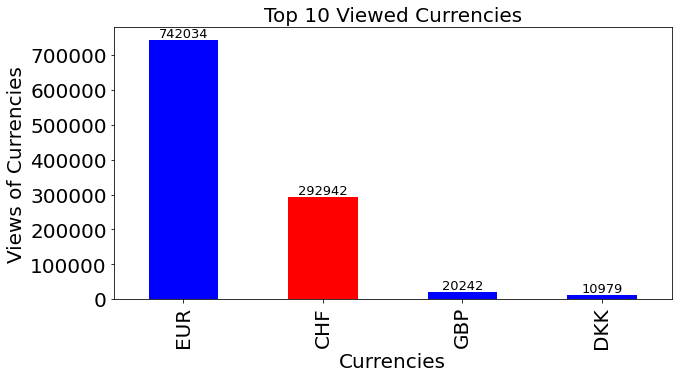

In [58]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Currency")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= ["Blue", "Red", "blue", "blue"])
ax = plt.gca()
ax.set_title('Top 10 Viewed Currencies',fontsize= 20)
ax.set_xlabel('Currencies',fontsize=20)
ax.set_ylabel("Views of Currencies", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)
plt.show()

In [59]:
data.Manufacturer.str.get_dummies().corrwith(data["Number of views last 7 days"]).sort_values(ascending= False).head(1)

Baha power boats    0.120396
dtype: float64

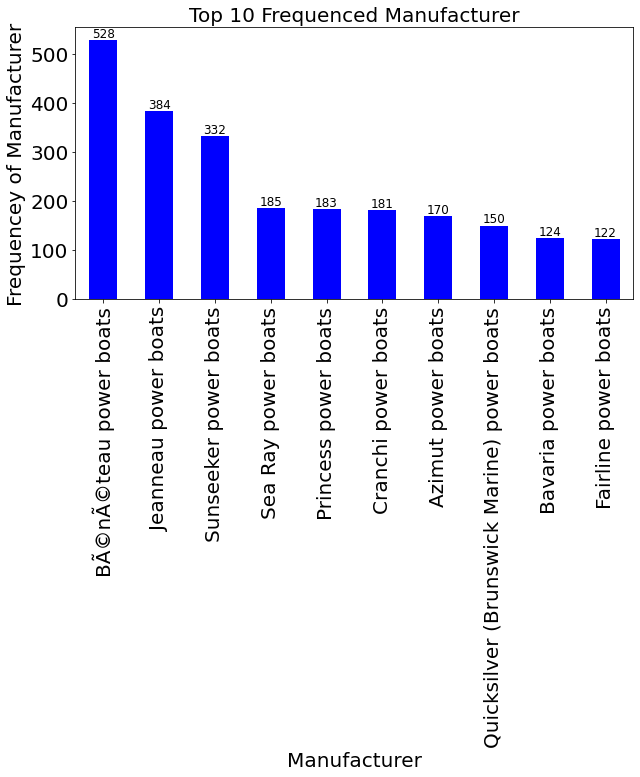

In [60]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Manufacturer")["Manufacturer"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced Manufacturer',fontsize= 20)
ax.set_xlabel('Manufacturer',fontsize=20)
ax.set_ylabel("Frequencey of Manufacturer", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

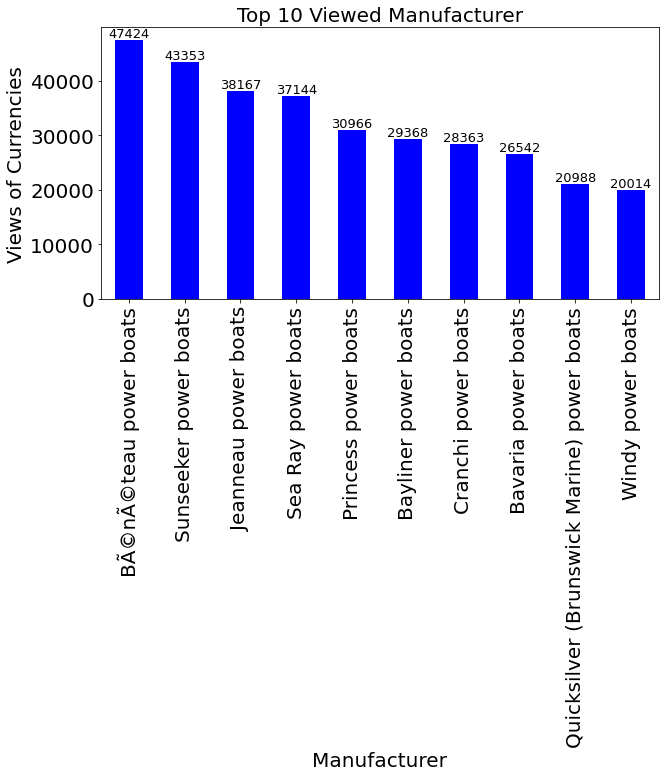

In [61]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Manufacturer")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed Manufacturer',fontsize= 20)
ax.set_xlabel('Manufacturer',fontsize=20)
ax.set_ylabel("Views of Currencies", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)
plt.show()

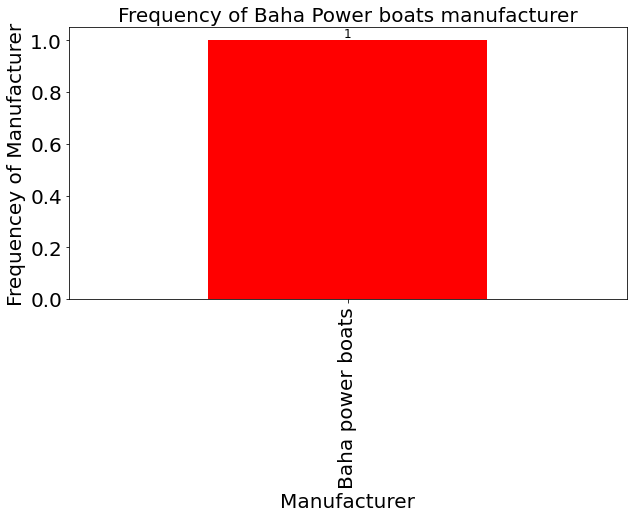

In [62]:
fig= plt.figure(figsize = (10, 5))
data[data["Manufacturer"]=="Baha power boats"].groupby("Manufacturer")["Manufacturer"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue"])
ax = plt.gca()
ax.set_title('Frequency of Baha Power boats manufacturer',fontsize= 20)
ax.set_xlabel('Manufacturer',fontsize=20)
ax.set_ylabel("Frequencey of Manufacturer", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

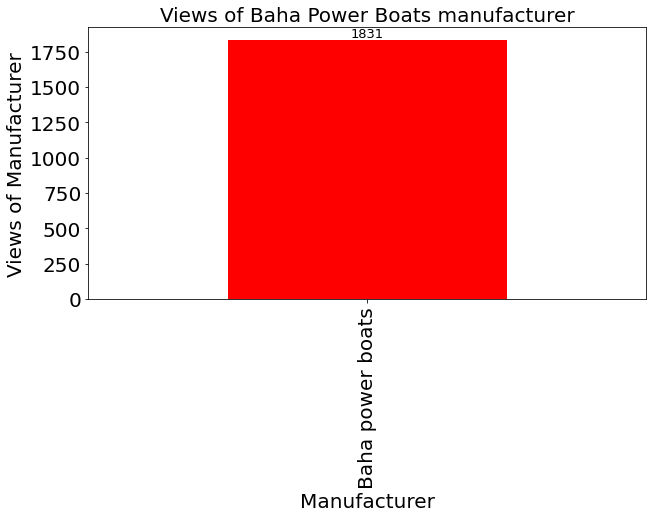

In [63]:
fig = plt.figure(figsize = (10, 5))
data[data["Manufacturer"]=="Baha power boats"].groupby("Manufacturer")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Views of Baha Power Boats manufacturer',fontsize= 20)
ax.set_xlabel('Manufacturer',fontsize=20)
ax.set_ylabel("Views of Manufacturer", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)
plt.show()

<Figure size 720x360 with 0 Axes>

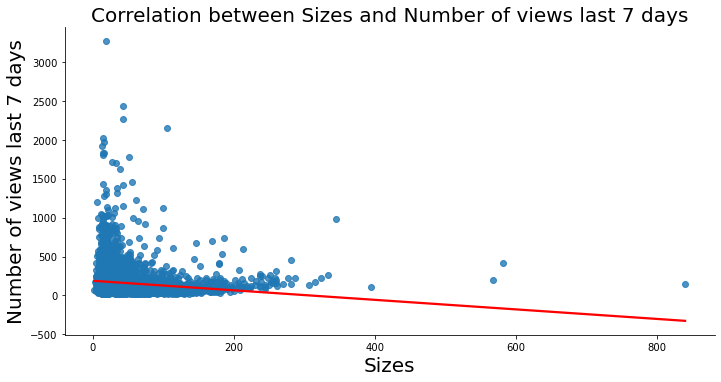

In [64]:
fig = plt.figure(figsize = (10, 5))
ax= sns.lmplot(x= 'Size', y= 'Number of views last 7 days', data = data,ci = None, line_kws={'color': 'red'}, height=5, aspect=2)
ax = plt.gca()
ax.set_title('Correlation between Sizes and Number of views last 7 days',fontsize= 20)
ax.set_xlabel('Sizes',fontsize=20)
ax.set_ylabel("Number of views last 7 days",fontsize=20)
plt.show()
fig.savefig('corrline size.jpg', bbox_inches='tight', dpi=150)

In [65]:
cor =round(data['Number of views last 7 days'].corr(data['Size']),2)
print("The correllation between the Size and number of views ini last 7 days is {}".format(cor))

The correllation between the Size and number of views ini last 7 days is -0.14


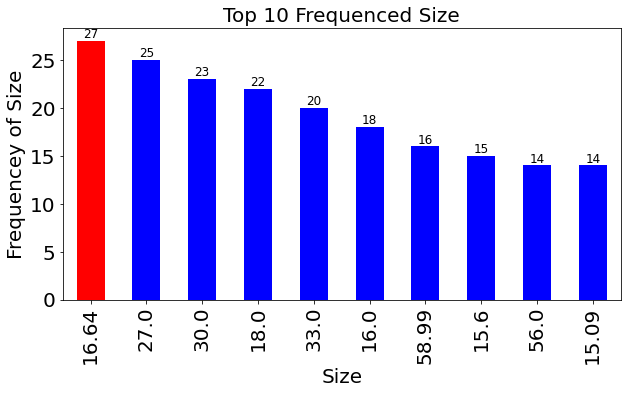

In [66]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Size")["Size"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced Size',fontsize= 20)
ax.set_xlabel('Size',fontsize=20)
ax.set_ylabel("Frequencey of Size", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

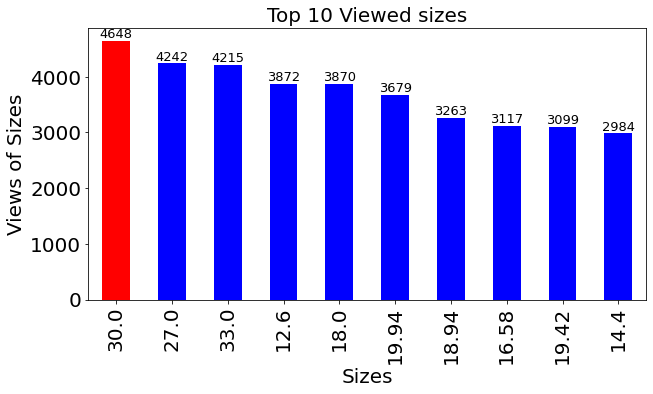

In [67]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Size")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed sizes',fontsize= 20)
ax.set_xlabel('Sizes',fontsize=20)
ax.set_ylabel("Views of Sizes", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)
plt.show()

<Figure size 720x360 with 0 Axes>

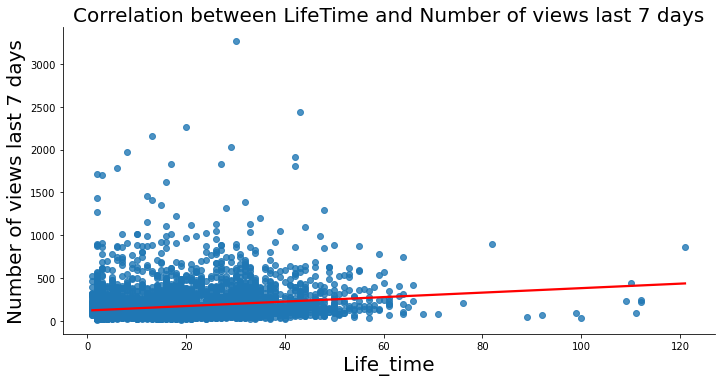

In [68]:
fig = plt.figure(figsize = (10, 5))
ax= sns.lmplot(x= 'Life_Time', y= 'Number of views last 7 days', data = data,ci = None, line_kws={'color': 'red'}, height=5, aspect=2)
ax = plt.gca()
ax.set_title('Correlation between LifeTime and Number of views last 7 days',fontsize= 20)
ax.set_xlabel('Life_time',fontsize=20)
ax.set_ylabel("Number of views last 7 days",fontsize=20)
plt.show()
fig.savefig('corrline.jpg', bbox_inches='tight', dpi=150)

In [69]:
cor =round(data['Number of views last 7 days'].corr(data['Life_Time']),2)
print("The correllation between the Lifetime and number of views ini last 7 days is {}".format(cor))

The correllation between the Lifetime and number of views ini last 7 days is 0.19


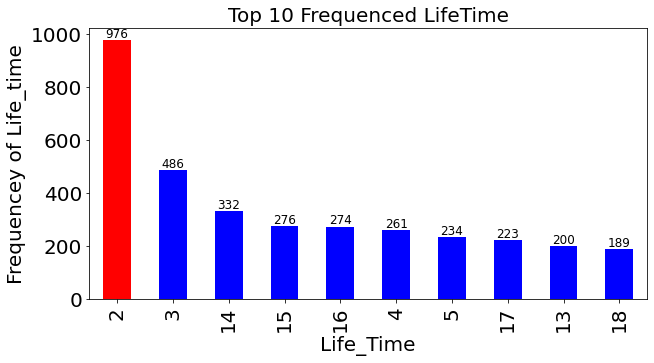

In [70]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Life_Time")["Life_Time"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced LifeTime',fontsize= 20)
ax.set_xlabel('Life_Time',fontsize=20)
ax.set_ylabel("Frequencey of Life_time", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

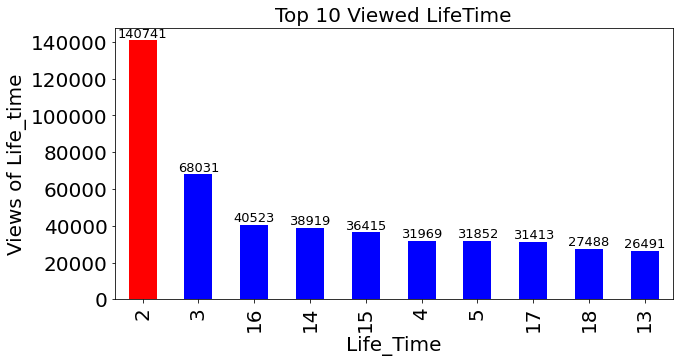

In [71]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Life_Time")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed LifeTime',fontsize= 20)
ax.set_xlabel('Life_Time',fontsize=20)
ax.set_ylabel("Views of Life_time", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)

plt.show()

In [72]:
data.Material.str.get_dummies().corrwith(data["Number of views last 7 days"]).sort_values(ascending= False).head(1)

Plastic    0.22658
dtype: float64

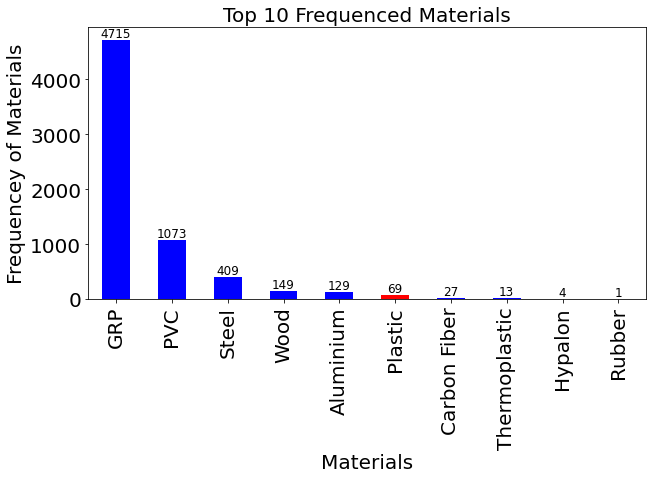

In [73]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Material")["Life_Time"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "blue", "blue", "blue", "blue", "red", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced Materials',fontsize= 20)
ax.set_xlabel('Materials',fontsize=20)
ax.set_ylabel("Frequencey of Materials", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

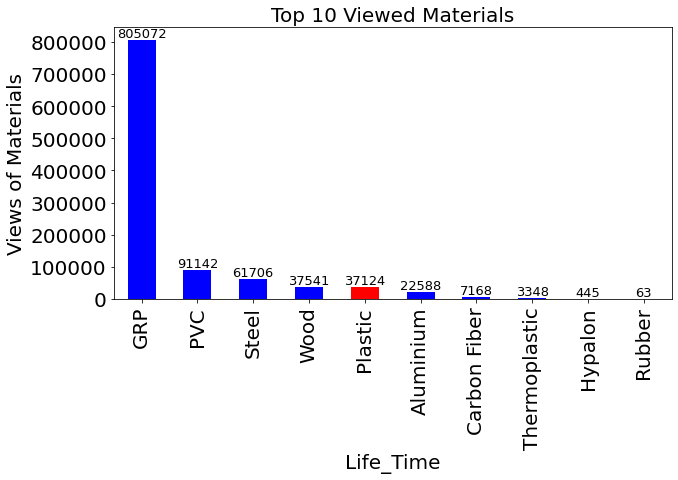

In [74]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Material")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "blue", "blue", "blue", "red", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed Materials',fontsize= 20)
ax.set_xlabel('Life_Time',fontsize=20)
ax.set_ylabel("Views of Materials", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)

plt.show()

In [75]:
data.Type.str.get_dummies().corrwith(data["Number of views last 7 days"]).sort_values(ascending= False).head(1)

Used boat,Unleaded    0.277778
dtype: float64

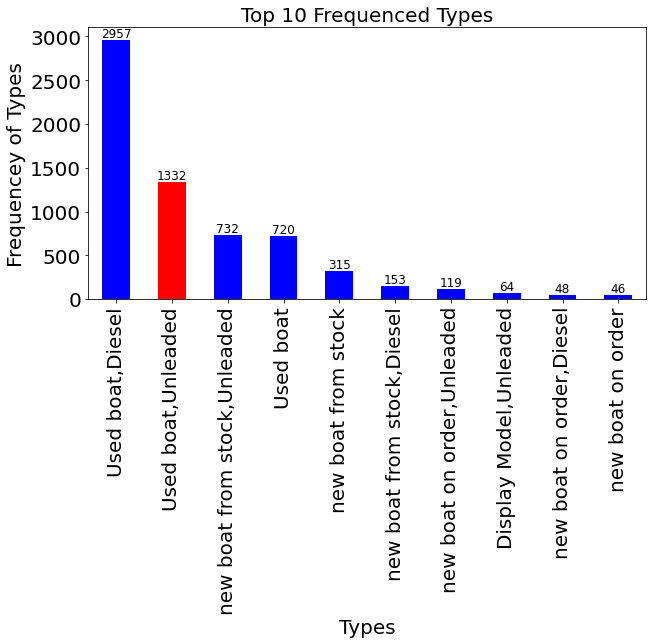

In [76]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Type")["Type"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced Types',fontsize= 20)
ax.set_xlabel('Types',fontsize=20)
ax.set_ylabel("Frequencey of Types", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

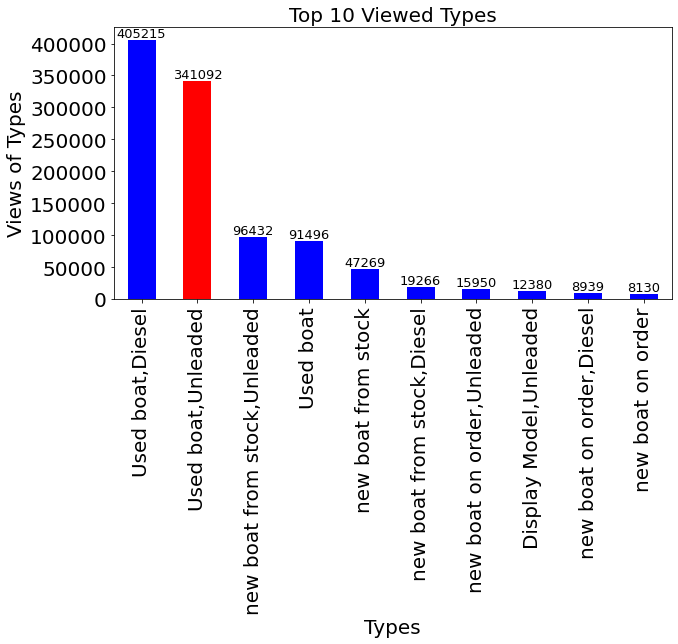

In [77]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Type")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed Types',fontsize= 20)
ax.set_xlabel('Types',fontsize=20)
ax.set_ylabel("Views of Types", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)

plt.show()

In [78]:
data["Boat Type"].str.get_dummies().corrwith(data["Number of views last 7 days"]).sort_values(ascending= False).head(1)

Bowrider,Motor Yacht,Sport Boat    0.151412
dtype: float64

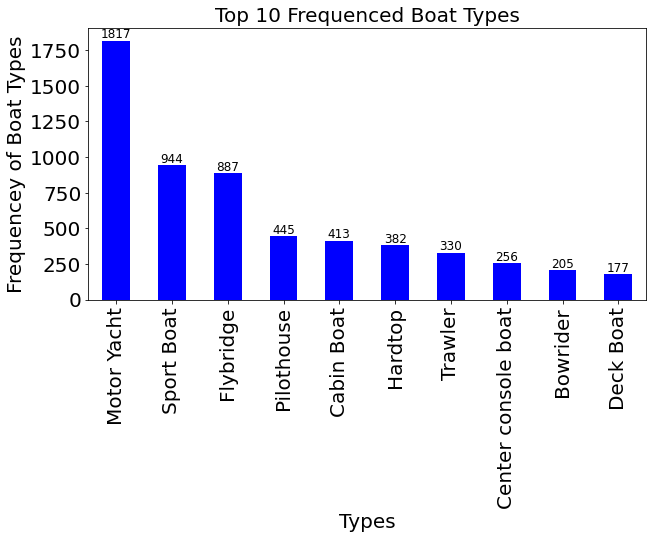

In [79]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Boat Type")["Boat Type"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced Boat Types',fontsize= 20)
ax.set_xlabel('Types',fontsize=20)
ax.set_ylabel("Frequencey of Boat Types", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

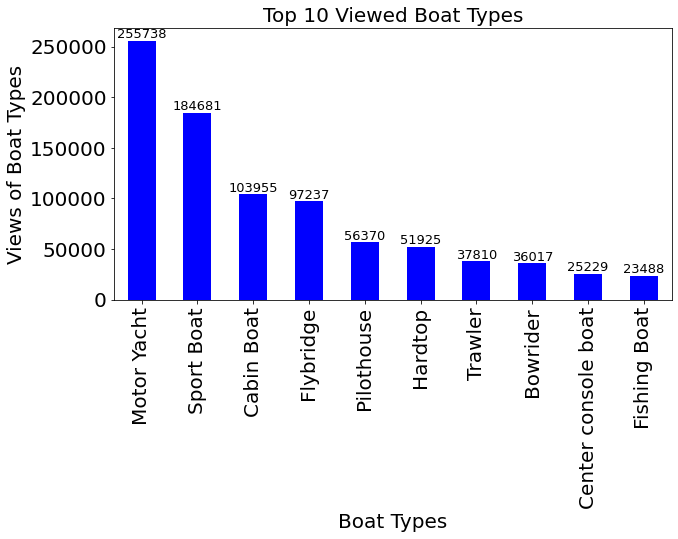

In [80]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Boat Type")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed Boat Types',fontsize= 20)
ax.set_xlabel('Boat Types',fontsize=20)
ax.set_ylabel("Views of Boat Types", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)

plt.show()

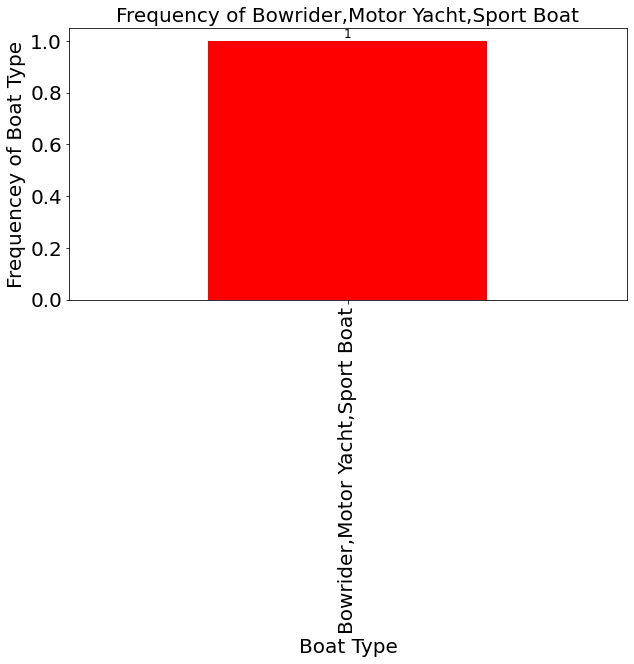

In [81]:
fig = plt.figure(figsize = (10, 5))
data[data["Boat Type"]=="Bowrider,Motor Yacht,Sport Boat"].groupby("Boat Type")["Boat Type"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Frequency of Bowrider,Motor Yacht,Sport Boat',fontsize= 20)
ax.set_xlabel('Boat Type',fontsize=20)
ax.set_ylabel("Frequencey of Boat Type", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

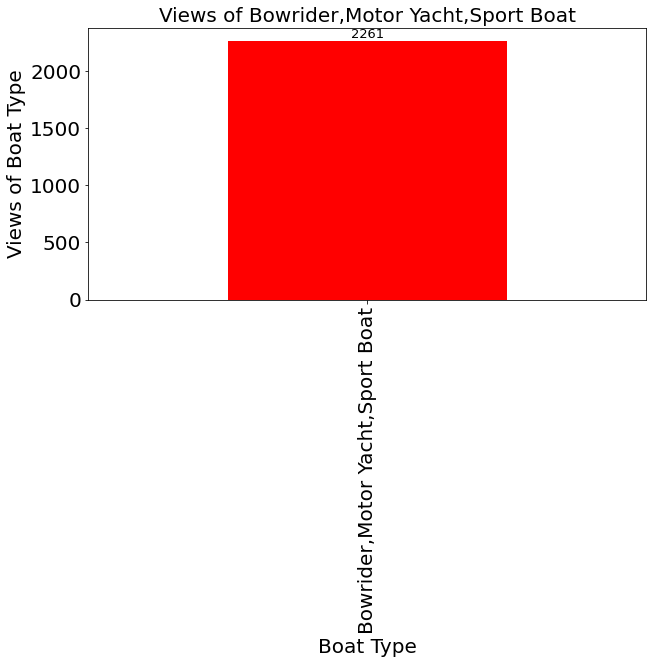

In [82]:
fig = plt.figure(figsize = (10, 5))
data[data["Boat Type"]=="Bowrider,Motor Yacht,Sport Boat"].groupby("Boat Type")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "Red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Views of Bowrider,Motor Yacht,Sport Boat',fontsize= 20)
ax.set_xlabel('Boat Type',fontsize=20)
ax.set_ylabel("Views of Boat Type", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)
plt.show()

In [83]:
data["Country"].str.get_dummies().corrwith(data["Number of views last 7 days"]).sort_values(ascending= False).head(1)

Switzerland    0.458858
dtype: float64

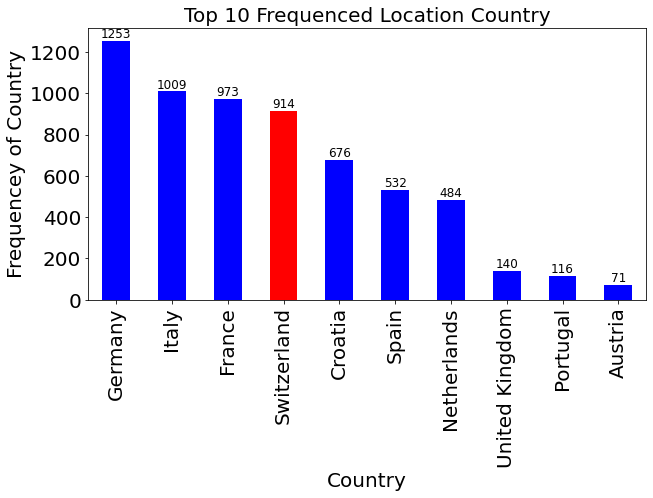

In [84]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Country")["Country"].count().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "blue", "blue", "blue", "red", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Frequenced Location Country',fontsize= 20)
ax.set_xlabel('Country',fontsize=20)
ax.set_ylabel("Frequencey of Country", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 12)
plt.show()

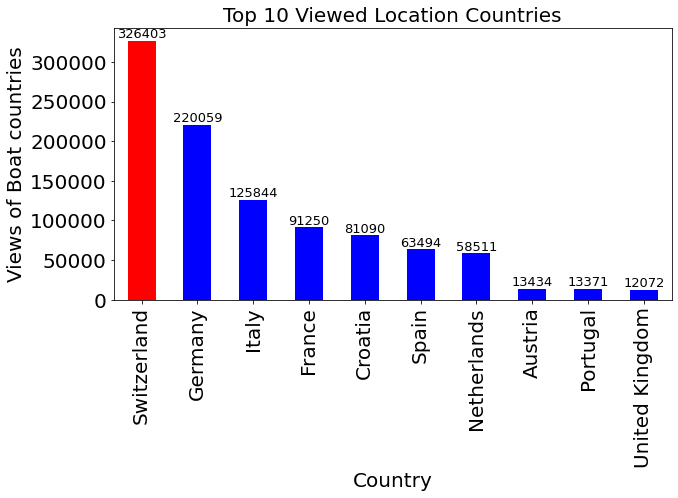

In [85]:
fig = plt.figure(figsize = (10, 5))
data.groupby("Country")["Number of views last 7 days"].sum().sort_values(ascending =False).head(10).plot(kind="bar", fontsize=20, color= [ "red", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue" ])
ax = plt.gca()
ax.set_title('Top 10 Viewed Location Countries',fontsize= 20)
ax.set_xlabel('Country',fontsize=20)
ax.set_ylabel("Views of Boat countries", fontsize=20)
ax.bar_label(ax.containers[0], label_type='edge',fontsize= 13)

plt.show()

# Conclusions
Based on the last 7 Days Data
- prices slighlty correlated to views with correlation coefficient -0.04.
- The most expensive Boats are not getting the most views.
- Its expected to increase views by 5 viewers for every 100 USD less.
- Features are getting most viewes:
- Location Country Switzerland
- Currency (CHF)
- used Boat,unleaded Type
- Baha Power Boat manufacturer
- Bowrider,Motor Yacht,Sport Boat Type
- Plastic Material
- Price 69680 is the most viewed by 7825 viewer.
- Size 30 M is the most viewed by 4648 viewer.
- LifeTime 2 years is the most viewed by 140741 viewer.